In [5]:
import hdf5storage
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #데이터 분할을 위해
from sklearn.metrics import confusion_matrix,f1_score,roc_auc_score,classification_report,roc_curve,auc
import import_ipynb
from movie_review_to_csv import reference


importing Jupyter notebook from movie_review_to_csv.ipynb
--->
{'en': 'https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.simple.zip', 'ja': 'https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ja.zip', 'file': 'file1'}
--------- load_model from files :  cc.ko.100.bin


[ 0.19283164  0.05622385  0.39025986  0.37203988  0.23402929  0.38279182
  0.43838459  0.4613224   0.52074522  0.72498018  0.22130172  0.21031669
  0.25367561  0.20135053  0.21454531  0.27527404  0.21335003  0.15581313
  0.46431756  0.41206071  0.20272523  0.21960784  0.33184224  0.33681807
  0.13956609  0.30766621  0.19377612  0.29703686  0.34232318  0.24203041
  0.21660356  0.26296669  0.24043749  0.65046531  0.2777319   0.14962038
  0.2851657   0.25057256  0.09326989  0.40948918  0.32756767  0.16301833
  0.24260299  0.27507055  0.17921793  0.13400397  0.27908689  0.30989209
  0.07099711  1.21506119  0.15886725  0.28319576  0.16485612  0.21882486
  0.26680073  0.38073108  0.34093565  0.26913977  0.15880363  0.36208564
  0.21569982  0.55004108  0.26268783  0.15013143  0.21037954  0.19820032
  0.2028698   0.16808054  0.1923276   0.23138741  0.30365738  0.30602372
  0.25725168  0.16920409  0.36689216  0.22371113  0.3098354   0.18096475
  0.13858552  0.1568362   0.15553126  0.19495496  0

In [6]:
def concat(data): 
    max_n=data.shape[1]   #열 개수 구하기
    data.columns=[i for i in range(max_n)] # columns 값 설정
    return data

In [7]:
def concat_style(data,style):    #data + style 합치는 부분
    only_data = data.iloc[:,:-4] #style 값 빼고
    re=pd.concat([only_data,style],axis= 1)
    max_n = re.shape[1]
    re.columns=[i for i in range(max_n)]
    return re

In [8]:
def model(X):
   
    ifor = IsolationForest(n_estimators=100, max_samples=512,contamination=0.0235).fit(X) #모델 생성  
    return ifor

In [9]:
def d_scatter(scores_f):
    
    for i in range(1000):
            plt.scatter(scores_f[i],1,color='red',marker='*') #빨간색 = 높은 차원


In [10]:
def s_scatter(scores_f):  
    for i in range(1000):
            plt.scatter(scores_f[0][i],1,color='red',marker='*') #빨간색 = 높은 차원

    for i in range(1000):
        plt.scatter(scores_f[1][i],0.8,color='blue',marker='*')  

    for i in range(1000):
            plt.scatter(scores_f[2][i],0.6,color='black',marker='*') 
    for i in range(1000):
            plt.scatter(scores_f[3][i],0.4,color='pink',marker='*') 
    

In [11]:
def demension_comp(data):
    
    
    
    
    c_data= concat(data)
    ifor=model(c_data)
    scores_f= -ifor.decision_function(c_data)
    d_scatter(scores_f)
    
    min_max_list = []
    
    min_index, max_index = min_max_index(scores_f)   #인덱스 추출
    min_max_list.append(min_index)
    min_max_list.append(max_index)
        
    
    return min_max_list

In [12]:
def style_comp(data):
    
    sty_list = style(data)
    s_data =[]
    ifor = []
    scores_f = []
    for i in range(len(sty_list)):
        s_data.append(concat_style(data,sty_list[i]))
    
    for i in range(len(s_data)):
        ifor.append(model(s_data[i]))
    
    for i in range(len(s_data)):
        scores_f.append(-ifor[i].decision_function(s_data[i]))  # 평균 이상치 점수 
    
    s_scatter(scores_f)
    
    min_max_list = []
    
    
    min_index, max_index = min_max_index(scores_f)   #인덱스 추출
    min_max_list.append(min_index)
    min_max_list.append(max_index)
    
    return min_max_list


In [13]:
def min_max_index(scores_f):
    min_f = min(scores_f)
    max_f = max(scores_f)
    
    cnt = 0 
    for i in range(len(scores_f)):
        if scores_f[i] == max_f:
            max_index = i
        if scores_f[i] == min_f:
            min_index = i
        
    return min_index, max_index

In [14]:
def d_exam(m_list,r_all):
    demension_list = ['-----------------------100차원-------------------------']
    columns_list = ['★review★','★평점★']
    minmax_list = ['-----------------------min-------------------------',
                  '-----------------------max-------------------------']    
    min_index=m_list[0]
    max_index=m_list[1]
    print(r_all[min_index])
    print(r_all[max_index])
    
    """
    
    cnt = 0
    n=0    
    for i in range(10):        
        if i % 2 == 0 :
            print(demension_list[n])
            print(minmax_list[0])
        else :
            print(minmax_list[1])
            
        for j in range(6):
            print(columns_list[j])
            print()
            print(r_all[m_list[i]][j])
            print()
        
        cnt +=1
        if cnt % 2 ==0:
            n+=1
            """
    

In [15]:
def s_exam(m_list,rlist):
    style_list = ['-----------------------style1-------------------------',
                 '-----------------------style2-------------------------',
                 '-----------------------style3-------------------------',
                 '-----------------------style4-------------------------']
    columns_list = ['★title★','★contents★','★style★']
    minmax_list = ['-----------------------min-------------------------',
                  '-----------------------max-------------------------']
    

    cnt = 0
    n=0
    for i in range(8):        
        if i % 2 == 0 :
            print(style_list[n])
            print(minmax_list[0])
        else :
            print(minmax_list[1])
            
        for j in range(3):
            print(columns_list[j])
            print()
            print(rlist[n][m_list[i]][j])
            print()
        cnt +=1
        if cnt % 2 ==0:
            n+=1
        

In [16]:
file='movie_review_100_4174.csv'  
data = pd.read_csv(file) 
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,평점
0,0.713039,0.466580,0.658579,0.581902,0.608896,0.525397,0.380469,0.464571,0.168389,0.192693,...,0.563180,0.773377,0.301809,0.573875,0.596300,0.543294,0.475270,0.194541,0.561005,0.111111
1,0.795205,0.458938,0.374140,0.550508,0.572113,0.359156,0.556198,0.314901,0.484355,0.212643,...,0.382634,0.709629,0.367036,0.590068,0.601604,0.534624,0.330818,0.192651,0.669978,1.000000
2,0.822306,0.449902,0.385756,0.457768,0.565959,0.362375,0.478749,0.482919,0.298590,0.324576,...,0.490406,0.817065,0.256781,0.582046,0.682395,0.619655,0.563028,0.160998,0.535029,1.000000
3,0.764364,0.554255,0.581975,0.330003,0.743241,0.319605,0.333774,0.393165,0.172459,0.276543,...,0.438788,0.784099,0.426769,0.825052,0.729257,0.354435,0.536414,0.097643,0.650712,0.000000
4,0.818189,0.500542,0.299088,0.619173,0.725738,0.577968,0.418546,0.370691,0.179442,0.230081,...,0.416429,0.716525,0.391331,0.691179,0.526432,0.591517,0.476010,0.244172,0.605639,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4169,0.862831,0.576394,0.309899,0.420605,0.544167,0.442254,0.454226,0.331125,0.362761,0.213802,...,0.536320,0.643622,0.371077,0.645171,0.550893,0.494134,0.463653,0.166656,0.719562,1.000000
4170,0.867934,0.573105,0.430274,0.488177,0.573552,0.283720,0.485079,0.378111,0.343868,0.264127,...,0.477206,0.722583,0.378165,0.649281,0.422763,0.469233,0.495058,0.226916,0.660731,0.888889
4171,0.832015,0.885121,0.413871,0.443720,0.570137,0.421263,0.543195,0.338865,0.440589,0.358377,...,0.471099,0.688799,0.383189,0.592430,0.543320,0.437196,0.502370,0.178321,0.610776,1.000000
4172,0.855002,0.678685,0.408914,0.474126,0.572372,0.414955,0.451880,0.325072,0.312053,0.250329,...,0.462958,0.688375,0.359895,0.670323,0.638263,0.537113,0.468414,0.181787,0.600646,0.555556


In [ ]:
def hi(scores):
    high_list=[]
    low_list=[]
    for i in range(len(scores)):
        if scores[i]<0:
            low_list.append(scores[i])
        else:
            high_list.append(scores[i])
    
    low_index=[]
    high_index=[]
    for i in range(len(low_list)):
        if scores[i] == low_list[i]:
            low_index.append(i)
    for i in range(len(high_list)):
        if scores[i] == high_list[i]:
            high_index.append(i)
    return low_index, high_index


In [ ]:
def result_func(low_, high_,asdf):
    for i in range()

In [17]:
def demen_comp(data):
    c_data= concat(data)
    ifor=model(c_data)
    scores_f= -ifor.decision_function(c_data)
    d_scatter(scores_f)
    
    return scores_f

In [ ]:
asdf=reference.values.tolist()


C:\Users\GiWoong\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


-0.15647035694377326

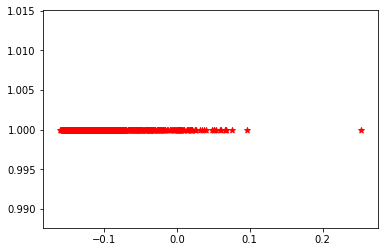

In [24]:
#Demension에 따른 이상치 점수 비교#
scores=demen_comp(data) 
low_,high_=hi(scores)
result_func(low_, high_,asdf)

[[0,
  '이게 평점 말이되나... 진짜 그냥 편지 갖다주는 아무내용 없는 영화인데... 나만 영화보는 눈이 다른가... 평점 2점 준다..',
  2],
 [2, '요즘 처럼 수익만 쫓아 공장에서 막 찍어내는 영화 속에서 홀로 빛나는 ‘영화’다.', 10],
 [3, '영화관에서 안 본 게 후회스러움', 10],
 [4, '아무내용 없음 핵노잼임', 1],
 [5, '전쟁 영화는 너무 많다. 하지만 이 영화는 그런 영화가 아니었다.', 10],
 [6, '미친 영화 영화속에 빨려들어갈거같다 명작', 10],
 [7, '처음부터 끝날때까지 원테이크 촬영. 내가 직접 전장에 나가 있는듯한 생생함. 긴장감을 늦출수가 없다.', 10],
 [8,
  '연출,연기,OST 모든게 완벽했고 번역까지 완벽했던 최고의 전쟁영화.영화보는 내내 몰입감 최대치에 정점을 찍고 어느새 주인공과 목적지까지 같이 뛰고있는 나를 발견했다..',
  10],
 [9, '홍보댓글그만좀?하세요ㆍ지루하고재미없슴?', 1],
 [10, '마음은 먼곳에, 전쟁은 눈앞에', 9],
 [11, '평점이 알바가 존재하네요그냥 3점정도가 적당함. 루즈해요', 4],
 [12, '돈아까움 내용이 없다.계속 전쟁인데 급한통보건을가지고 길찾아가는 군인 이야기였음....', 1],
 [13,
  '코로나때문에 묻히기 너무나 아까운 영화네요 보는내내 긴장되서 숨이안쉬어져요  그냥 전쟁액션영화를 좋아하시는 분들은 지루하실것 같아요',
  10],
 [14,
  '이 영화 보실 때 산소호흡기 꼭 지참하고 보세요.. 숨 못쉽니다 진짜로.. 영화 다 끝나고 제일 먼저 든 생각이 뭐야 왜 벌써 끝나?였습니다.. 러닝타임 2시간 정도인데 ㄹㅇ 50분 본것 같았어요 ㄹㅇㄹㅇ;; 막 엄...',
  10],
 [15, '다들 이 시국에 극장 간 흑우 없죠', 8],
 [16,
  '왜 평점이 높지? 전쟁영화치고는 별로 감동적이지 않은데... 액션도 없고...처음으로 만원 질렀는데.. 만원주고 보기엔 매우 아까움',
  6],

In [106]:
max_min_index
refer=reference.values.tolist()

In [110]:
d_exam(max_min_index,refer)


[4118, '생일에 개봉해서 봤는데 감동 그 이상을 안겨준 영화. 무엇보다 원테이크 핸드테이킹 촬영으로 처음부터 끝까지 장면전환 없이 주인공을 비춰준다. 몰입도 장난 아니고 내가 직접 여정을 떠나는 느낌이다.. 원테이크 촬영도 ...', 10]
[1505, '명작', 9]


C:\Users\GiWoong\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


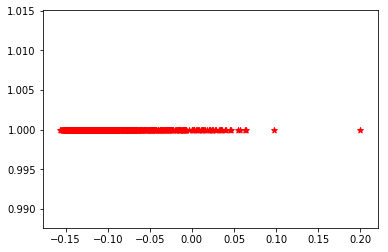

In [108]:
#Demension에 따른 이상치 점수 비교#
max_min_index=demension_comp(data) 

In [109]:
d_exam(max_min_index,reference_all)
################################

NameError: name 'reference_all' is not defined